In [20]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import patsy
import matplotlib.pyplot as plt


# 소수점 설정
pd.options.display.float_format = "{:,.3f}".format

## 4. OLS 회귀분석

- 교육서비스와 소득에 경제학적 접근
    - 교육에 투자해야 할 이유
        - 개인의 경우 소득.
        - 정부의 경우 미래 세금 수입.
    - 얼마나 많은 교육 서비스를 제공 할 지
        - 유한한 자원: 서비스 비용의 증가.
        - 효율적인 자원분배: 복지나 인프라에 투자 가능.

![fig_3_1_2](doc\img\Figure_3_1_2.png)

![fig_3_1_3_a](doc\img\Figure_3_1_3_a.png)

- OLS의 구성
    - 결과값
        - 평균
    - 결과값이 얼마나 믿을만 한지 검사
        - 표준오차(standard error): 표준편차랑 거의 같음

In [3]:
df_income = pd.read_csv(r'data\Dehejia_and_Wahba_1999\data_cps78_income.csv')
df_income

,Unnamed: 0,income_78,edu_year,age,edu_level,income_at_23,ln_income_at_23
0,0,"9,930.05",11,37,Secondary,"46,406.21",10.75
1,1,"3,595.89",9,22,Secondary,"16,804.74",9.73
2,2,"24,909.45",12,30,Secondary,"116,409.64",11.66
3,3,"7,506.15",11,27,Secondary,"35,078.57",10.47
4,4,289.79,8,33,Secondary,"1,354.28",7.21
...,...,...,...,...,...,...,...
13955,13955,"2,757.44",12,22,Secondary,"12,886.37",9.46
13956,13956,"6,895.07",12,20,Secondary,"32,222.83",10.38
13957,13957,"4,221.86",12,37,Secondary,"19,730.10",9.89
13958,13958,"13,671.93",9,47,Secondary,"63,893.20",11.06


In [ ]:
# df_40_to_49 = pd.read_stata(r'data\Dehejia_and_Wahba_1999\cps1re74.dta')
# df_40_to_49 = df_40_to_49.loc[df_40_to_49['age'].isin(range(40,50))].loc[df_40_to_49['re78']>0].reset_index(drop=True)
# df_40_to_49['earning'] = df_40_to_49['re78']
# df_40_to_49['ln_earning'] = np.log(df_40_to_49['earning'])
# df_40_to_49['school'] = df_40_to_49 ['ed']
# df_40_to_49 = df_40_to_49[['earning', 'ln_earning', 'school','age']]
# df_40_to_49

![normal dist](https://currentprotocols.onlinelibrary.wiley.com/cms/asset/d39ab523-dfbe-4589-89ab-28afcbc9e0c1/cpz1801-fig-0005-m.jpg)  

![fig_3_1_3_a](doc\img\Figure_3_1_3_a.png)

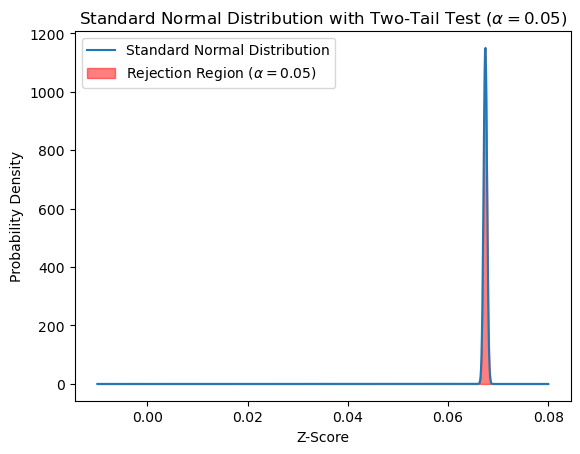

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the standard normal distribution
mu = 0.0674387  # Mean
sigma = 0.0003447  # Standard deviation

# Generate points on the x axis between -4 and 4:
x = np.linspace(-0.01, 0.08, 1000)
# Calculate the normal distribution's PDF at these points:
y = norm.pdf(x, mu, sigma)

# Plot the standard normal distribution
plt.plot(x, y, label='Standard Normal Distribution')

# Shade the two-tail test areas for alpha = 0.95
alpha = 0.05
# Determine the z-scores for the two-tail test
z_left = norm.ppf(alpha / 2)
z_right = norm.ppf(1 - (alpha / 2))

# Fill between for the two-tail areas
plt.fill_between(x, y, where=(x < (mu-z_left)) | (x > (mu+z_right)), color='red', alpha=0.5, label='Rejection Region ($\\alpha=0.05$)')

plt.title('Standard Normal Distribution with Two-Tail Test ($\\alpha=0.05$)')
plt.xlabel('Z-Score')
plt.ylabel('Probability Density')
plt.legend()

plt.show()


                            OLS Regression Results                            
Dep. Variable:        ln_income_at_23   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     253.2
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           1.63e-56
Time:                        11:48:03   Log-Likelihood:                -19164.
No. Observations:               13960   AIC:                         3.833e+04
Df Residuals:                   13958   BIC:                         3.835e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4906      0.035    300.733      0.0

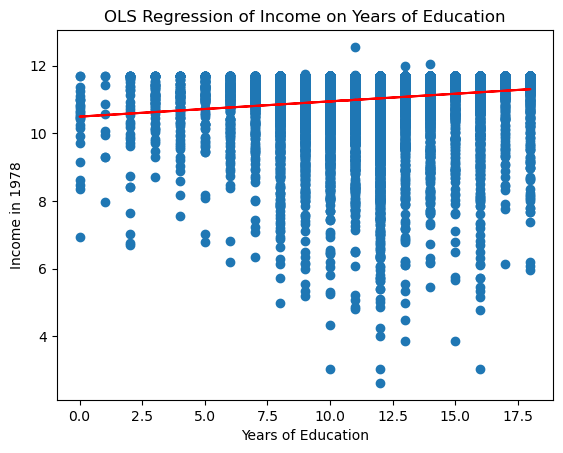

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/SeanJSLee/Teaching_YU_DS_basic_KR/main/data/Dehejia_and_Wahba_1999/data_cps78_income.csv"
data = pd.read_csv(url)

# Define the dependent variable (ln_income_at_23) and the independent variable (edu_year)
X = data[['edu_year']]  # Independent variable(s)
y = data['ln_income_at_23']  # Dependent variable

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Make predictions using the model
predictions = model.predict(X)

# Plot the data and the regression line
plt.scatter(X['edu_year'], y)
plt.plot(X['edu_year'], predictions, color='red')
plt.xlabel('Years of Education')
plt.ylabel('Income in 1978')
plt.title('OLS Regression of Income on Years of Education')
plt.show()


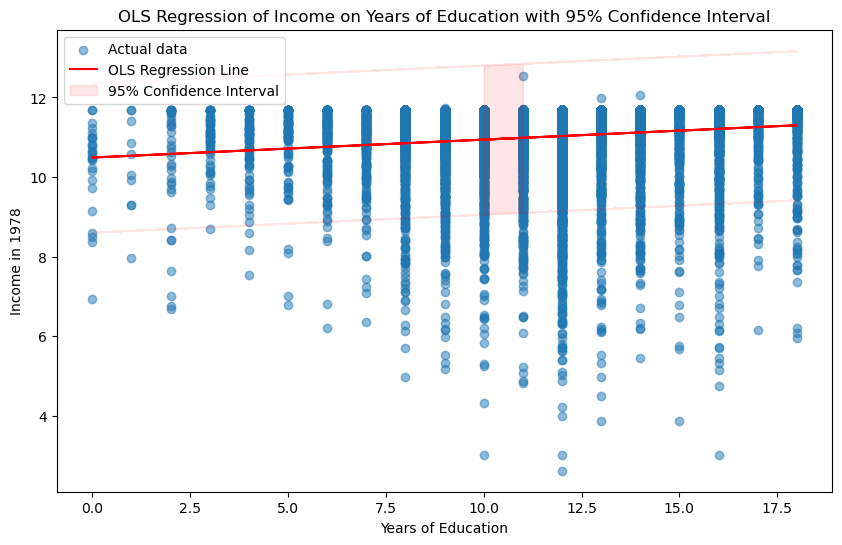

In [4]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/SeanJSLee/Teaching_YU_DS_basic_KR/main/data/Dehejia_and_Wahba_1999/data_cps78_income.csv"
data = pd.read_csv(url)

# Define the dependent and independent variables
X = data[['edu_year']]  # Independent variable
y = data['ln_income_at_23']  # Dependent variable

# Add a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Make predictions
predictions = model.predict(X)

# Calculate the 95% confidence interval for the predictions
prediction_std, lower_bound, upper_bound = wls_prediction_std(model, exog=X, alpha=0.05)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X['edu_year'], y, alpha=0.5, label='Actual data')
plt.plot(X['edu_year'], predictions, color='red', label='OLS Regression Line')
plt.fill_between(X['edu_year'], lower_bound, upper_bound, color='r', alpha=0.1, label='95% Confidence Interval')
plt.xlabel('Years of Education')
plt.ylabel('Income in 1978')
plt.title('OLS Regression of Income on Years of Education with 95% Confidence Interval')
plt.legend()
plt.show()


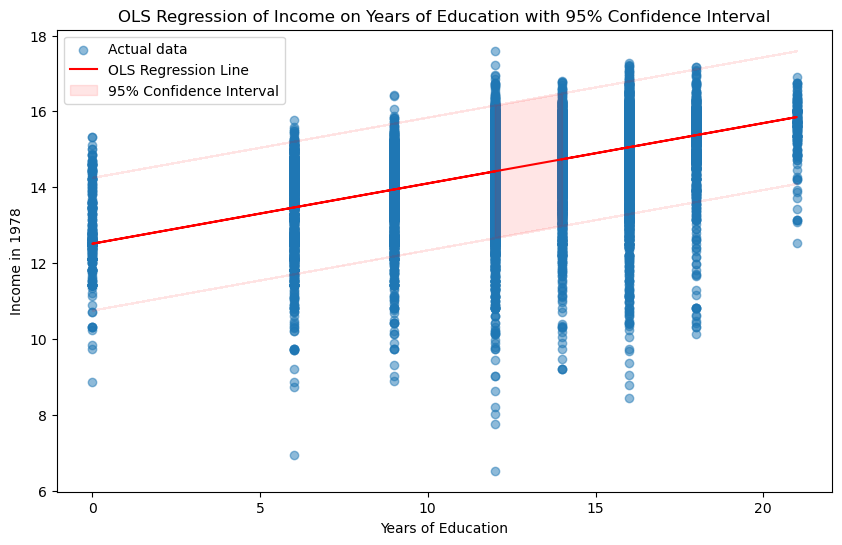

In [9]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/SeanJSLee/Teaching_YU_DS_basic_KR/main/data/KOSIS_houshold_panel_survey/data_income_kor.csv"
data = pd.read_csv(url)

# Define the dependent and independent variables
X = data[['edu_year']]  # Independent variable
y = data['ln_income']  # Dependent variable

# Add a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Make predictions
predictions = model.predict(X)

# Calculate the 95% confidence interval for the predictions
prediction_std, lower_bound, upper_bound = wls_prediction_std(model, exog=X, alpha=0.05)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X['edu_year'], y, alpha=0.5, label='Actual data')
plt.plot(X['edu_year'], predictions, color='red', label='OLS Regression Line')
plt.fill_between(X['edu_year'], lower_bound, upper_bound, color='r', alpha=0.1, label='95% Confidence Interval')
plt.xlabel('Years of Education')
plt.ylabel('Income in 1978')
plt.title('OLS Regression of Income on Years of Education with 95% Confidence Interval')
plt.legend()
plt.show()


In [7]:
y,X = patsy.dmatrices('ln_income_at_23 ~ edu_year',data=df_income, return_type='dataframe')

result = sm.OLS(y,X).fit(cov_type='HC0')
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ln_income_at_23   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     245.4
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           7.49e-55
Time:                        17:26:20   Log-Likelihood:                -19164.
No. Observations:               13960   AIC:                         3.833e+04
Df Residuals:                   13958   BIC:                         3.835e+04
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4906      0.036    292.881      0.000      10.420      10.561
edu_year       0.0450      0.003     15.667      0.000       0.039       0.051
==============================================================================
Omnibus:                     7880.097   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68169.419
Skew:                          -2.627   Prob(JB):                         0.00
Kurtosis:                      12.465   Cond. No.                         53.5
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

### 6. OLS 해석

[statsmodels.regression.linear_model.OLSResults](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.html)

 * OBS  


In [21]:
result.nobs

13960.0


 * Wald test [res.wald_test()](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.wald_test.html)  
 follows k DoF. Chi-squared distribution. (9.210 @ k=2, alpha=.99) [critical value table](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3674.htm)

In [22]:
result.wald_test(result.params.index.to_list(), use_f=False, scalar=True)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=1870626.2975232098, p-value=0.0, df_denom=2>

In [23]:
from scipy.stats import chi2
chi2.ppf(.99,df=2)

9.21034037197618

 * Coeff   
 
|variable   | coef	  |  
|--         | --:      |
| Intercept	| 9.4069  |
| school	  | 0.0230  | 



In [24]:
result.params

Intercept   10.491
edu_year     0.045
dtype: float64

 * t stat and SE
  
|variable   | std err	| t       | P>\|t\| |  
|--         | --:      | --:      | --: |
| Intercept	| 0.060   | 156.583 | 0.000 |
| school	  | 0.005   | 4.445   | 0.000 | 



In [25]:
result.bse

Intercept   0.036
edu_year    0.003
dtype: float64

In [26]:
result.tvalues

Intercept   292.881
edu_year     15.667
dtype: float64

In [27]:
result.pvalues

Intercept   0.000
edu_year    0.000
dtype: float64

 * Confidence interval

  
|variable   | \[0.025	  | 0.975\]	  |  
|--         | --:      |--:      |
| Intercept	| 9.289  |9.4069  |
| school	  | 0.013  |0.033  | 



In [28]:
result.conf_int()

,0,1
Intercept,10.420,10.561
edu_year,0.039,0.051


 * R-squared
 

In [29]:
result.rsquared_adj

0.017747284527518725

* consider an alternative specification - RMSE

In [30]:
result.mse_resid**.5

0.9549736923548962

OLS in matrix form.

In [31]:
mat_x = np.matrix(X)
mat_y = np.matrix(y)

xTx = mat_x.T * mat_x
xTx_inv = np.linalg.inv(xTx)
xTy = mat_x.T * mat_y

beta_hat = xTx_inv * xTy
print('beta :',beta_hat, '\nbeta 0:',beta_hat[0], '\nbeta 1:',beta_hat[1])

beta : [[10.49061331]
 [ 0.04503469]] 
beta 0: [[10.49061331]] 
beta 1: [[0.04503469]]


<Axes: xlabel='edu_year'>

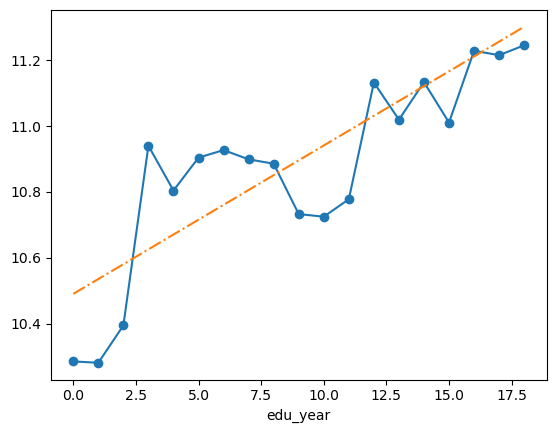

In [44]:
school_means = df_income.groupby('edu_year')['ln_income_at_23'].mean()
yhat = pd.Series(result.params['Intercept'] + result.params['edu_year'] * school_means.index.values, index=school_means.index.values)


plt.figure()
school_means.plot(kind='line', x='edu_year', y='ln_earning_23', style='-o')
yhat.plot(style='-.')

In [38]:
y,X = patsy.dmatrices('ln_income_at_23 ~ edu_year + age',data=df_income, return_type='dataframe')

model_2 = sm.OLS(y,X)
result_2 = model_2.fit(cov_type='HC0')
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ln_income_at_23   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     487.5
Date:                Thu, 07 Mar 2024   Prob (F-statistic):          2.25e-205
Time:                        17:33:05   Log-Likelihood:                -18743.
No. Observations:               13960   AIC:                         3.749e+04
Df Residuals:                   13957   BIC:                         3.751e+04
Df Model:                           2                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.6654      0.048    199.425      0.000       9.570       9.760
edu_year       0.0554      0.003     19.144      0.000       0.050       0.061
age            0.0214      0.001     28.383      0.000       0.020       0.023
==============================================================================
Omnibus:                     8185.735   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79318.302
Skew:                          -2.714   Prob(JB):                         0.00
Kurtosis:                      13.339   Cond. No.                         204.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [47]:
df_income['age'].mean()

32.79068767908309

<Axes: xlabel='edu_year'>

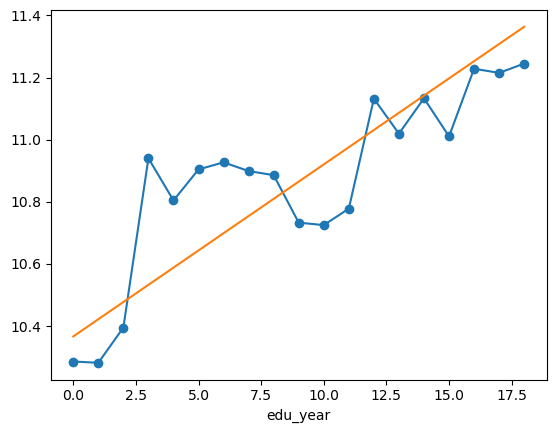

In [48]:
school_means = df_income.groupby('edu_year')['ln_income_at_23'].mean()
yhat = pd.Series(df_income['age'].mean() * result_2.params['age']+ result_2.params['Intercept'] + result_2.params['edu_year'] * school_means.index.values, index=school_means.index.values)

import matplotlib.pyplot as plt

plt.figure()
school_means.plot(kind='line', x='edu_year', y='ln_income_at_23', style='-o')
yhat.plot()

In [41]:
df_40_to_49['experience'] = df_40_to_49['age'] - df_40_to_49['school']
y,X = patsy.dmatrices('ln_earning ~ school + experience ',data=df_40_to_49, return_type='dataframe')

model_3 = sm.OLS(y,X)
result_3 = model_3.fit(cov_type='HC0')
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ln_earning   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     8.230
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           0.000274
Time:                        14:18:44   Log-Likelihood:                -3139.2
No. Observations:                2543   AIC:                             6284.
Df Residuals:                    2540   BIC:                             6302.
Df Model:                           2                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1073      0.258     35.241      0.000       8.601       9.614
school         0.0301      0.008      3.633      0.000       0.014       0.046
experience     0.0066      0.006      1.195      0.232      -0.004       0.017
==============================================================================
Omnibus:                     1659.354   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18445.660
Skew:                          -3.021   Prob(JB):                         0.00
Kurtosis:                      14.729   Cond. No.                         571.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

C:\Users\SeanJ\AppData\Local\Temp\ipykernel_5308\1114850971.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yhat = pd.Series(result_3.params[0] + result_3.params[1] * school_means.index.values, index=school_means.index.values)


<Axes: xlabel='school'>

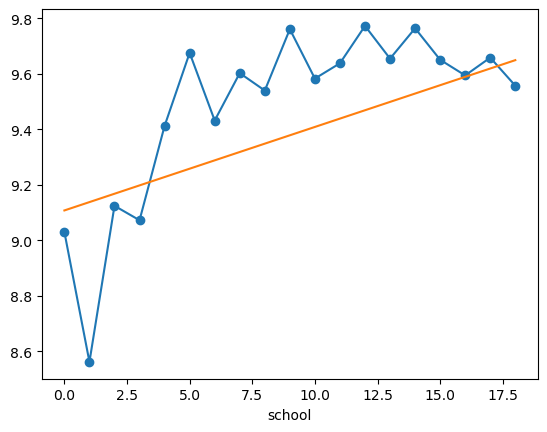

In [26]:
school_means = df_40_to_49.groupby('school')['ln_earning'].mean()
yhat = pd.Series(result_3.params[0] + result_3.params[1] * school_means.index.values, index=school_means.index.values)

import matplotlib.pyplot as plt

plt.figure()
school_means.plot(kind='line', x='school', y='ln wage', style='-o')
yhat.plot()

In [34]:
result_3.mse_model**.5

2.701854947826664

In [33]:
result.mse_model**.5

3.6985881186855756

In [68]:
def stats(ols_result):
    list_stats = []
    list_stats += [ols_result.nobs]
    list_stats += [ols_result.mse_resid**.5]
    list_stats += [ols_result.rsquared]
    list_stats += [ols_result.rsquared_adj]
    list_stats += [ols_result.df_resid]
    list_stats += [ols_result.params['school']]
    return list_stats

pd.DataFrame(
        {
        'model 1' : stats(result),
        'model 2' : stats(result_2),
        'model 3' : stats(result_3)
        },
             index=['obs','rmse','R2','Adj R2','DoF','b_school'])

,model 1,model 2,model 3
obs,2543.000000,2543.000000,2543.000000
rmse,0.832065,0.832044,0.832011
R2,0.007716,0.008546,0.008235
Adj R2,0.007325,0.007375,0.007454
DoF,2541.000000,2539.000000,2540.000000
b_school,0.022967,0.023526,0.030084


C:\Users\SeanJ\AppData\Local\Temp\ipykernel_5308\1876056179.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yhat = pd.Series(result.params[0] + result.params[1] * school_means.index.values, index=school_means.index.values)
C:\Users\SeanJ\AppData\Local\Temp\ipykernel_5308\1876056179.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yhat_2 = pd.Series(result_2.params[0] + result_2.params[1] * school_means.index.values, index=school_means.index.values)
C:\Users\SeanJ\AppData\Local\Temp\ipykernel_5308\1876056179.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, i

<Axes: xlabel='school'>

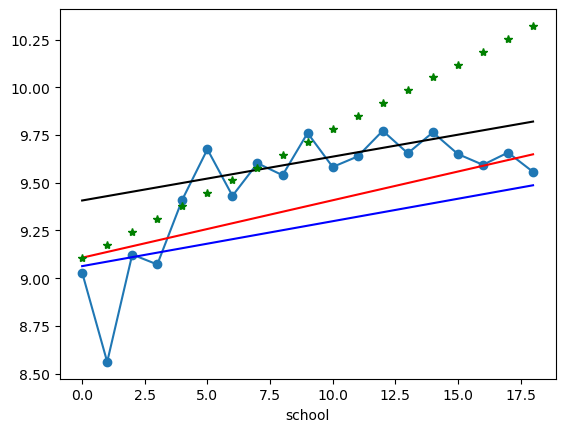

In [71]:
school_means = df_40_to_49.groupby('school')['ln_earning'].mean()
yhat = pd.Series(result.params[0] + result.params[1] * school_means.index.values, index=school_means.index.values)
yhat_2 = pd.Series(result_2.params[0] + result_2.params[1] * school_means.index.values, index=school_means.index.values)
yhat_3 = pd.Series(result_3.params[0] + result_3.params[1] * school_means.index.values, index=school_means.index.values)
# textbook 
y_textbook = pd.Series(result_3.params[0] + 0.0674387 * school_means.index.values, index=school_means.index.values)

import matplotlib.pyplot as plt

plt.figure()
school_means.plot(kind='line', x='school', y='ln wage', style='-o')
yhat.plot(c='k')
yhat_2.plot(c='b')
yhat_3.plot(c='r')
y_textbook.plot(c='g',style='*')

In [76]:
result.wald_test(['Intercept', 'school'], use_f=False, scalar=True)
result_2.wald_test(['Intercept', 'school'], use_f=False, scalar=True)


<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=1383.31030321759, p-value=4.149390194713e-301, df_denom=2>

In [77]:
result_3.wald_test(['Intercept', 'school'], use_f=False, scalar=True)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=5266.289531728599, p-value=0.0, df_denom=2>

In [78]:
result_3.wald_test(['Intercept', 'school','experience'], use_f=False, scalar=True)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=349345.49099017336, p-value=0.0, df_denom=3>